<a href="https://colab.research.google.com/github/aryanwalia2003/loan_approval_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d rishikeshkonapure/home-loan-approval

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 23.4MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/home-loan-approval.zip", "r")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
loan=pd.read_csv("/content/loan_sanction_train.csv")

In [ ]:
loan.shape

(614, 13)

In [ ]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan.duplicated().sum()

0

In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan.Gender.fillna("Others",inplace=True)

In [ ]:
loan.Dependents.replace("3+","3",inplace=True)

In [ ]:
loan.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [ ]:
loan['Dependents'] = pd.to_numeric(loan['Dependents'], errors='coerce')

# calculate the average of non-NaN values
avg = np.nanmean(loan['Dependents'])

# replace the NaN values with the average
loan['Dependents'].fillna(avg, inplace=True)

# convert the 'dependent' column to integer data type
loan['Dependents'] = loan['Dependents'].astype(int)

In [ ]:
loan.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan.Self_Employed.fillna("Unknown",inplace=True)

In [ ]:
loan.Married.fillna("Unknown",inplace=True)

In [ ]:
loan.LoanAmount.fillna(loan.LoanAmount.mean(),inplace=True)

In [ ]:
loan.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
200,LP001674,Male,Yes,1,Not Graduate,No,2600,2500.0,90.000000,360.0,1.0,Semiurban,Y
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,146.412162,360.0,1.0,Semiurban,N
334,LP002103,Others,Yes,1,Graduate,Yes,9833,1833.0,182.000000,180.0,1.0,Urban,Y
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.000000,360.0,0.0,Semiurban,N
331,LP002098,Male,No,0,Graduate,No,2935,0.0,98.000000,360.0,1.0,Semiurban,Y


In [ ]:
loan.Loan_Amount_Term.fillna(loan.Loan_Amount_Term.mean(),inplace=True)

In [ ]:
loan.Credit_History.fillna(1,inplace=True)

In [ ]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan.dropna(subset=['Loan_Status'], inplace=True)

In [ ]:
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [ ]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
loan.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [ ]:
loan.Gender=encoder.fit_transform(loan.Gender) #male=1

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
loan.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
columns_to_encode = ['Married', 'Education', 'Property_Area',"Loan_Status","Self_Employed"]

# Loop over each column and apply label encoding
for col in columns_to_encode:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col].astype(str))

In [ ]:
loan.LoanAmount=loan.LoanAmount.astype(int)

In [ ]:
loan.Loan_Amount_Term=loan.Loan_Amount_Term.astype(int)
loan.CoapplicantIncome=loan.CoapplicantIncome.astype(int)
loan.Credit_History=loan.Credit_History.astype(int)

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,146,360,1,2,1
1,LP001003,1,2,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,2,0,0,2,3000,0,66,360,1,2,1
3,LP001006,1,2,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1


In [ ]:
loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,1.301303,0.744300,0.218241,0.319218,5403.459283,1621.24430,146.397394,342.000000,0.855049,1.037459,0.687296
std,0.421752,0.951738,1.009623,0.413389,0.696570,6109.041673,2926.24876,84.037503,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,3.000000,1.000000,2.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0,146,360,1,2,1
1,LP001003,1,2,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,2,0,0,2,3000,0,66,360,1,2,1
3,LP001006,1,2,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1


In [ ]:
loan.drop(columns={"Loan_ID"},inplace=True)

In [ ]:
loan.drop(columns={"Gender"},inplace=True)

In [ ]:
loan.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
corr_df=loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status']]

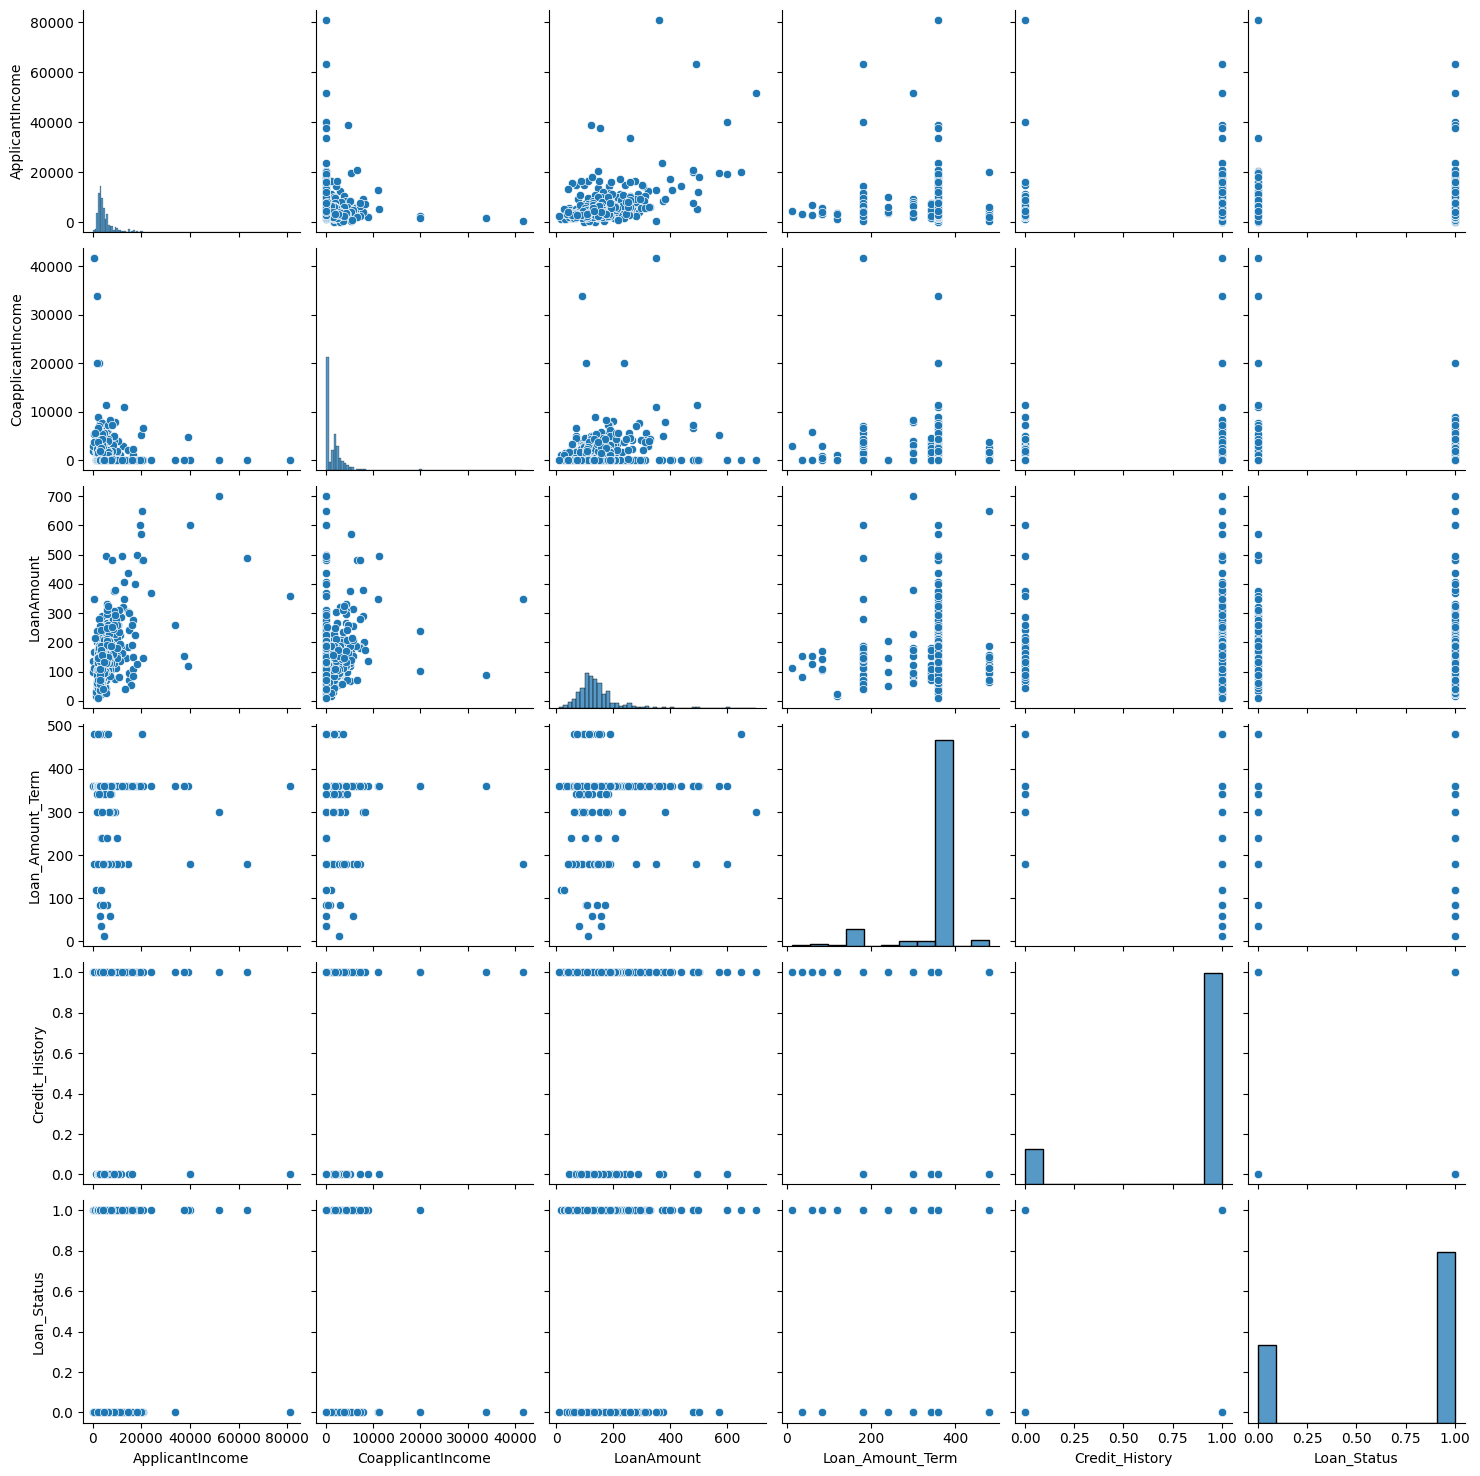

In [ ]:
sns.pairplot(corr_df)

<Axes: >

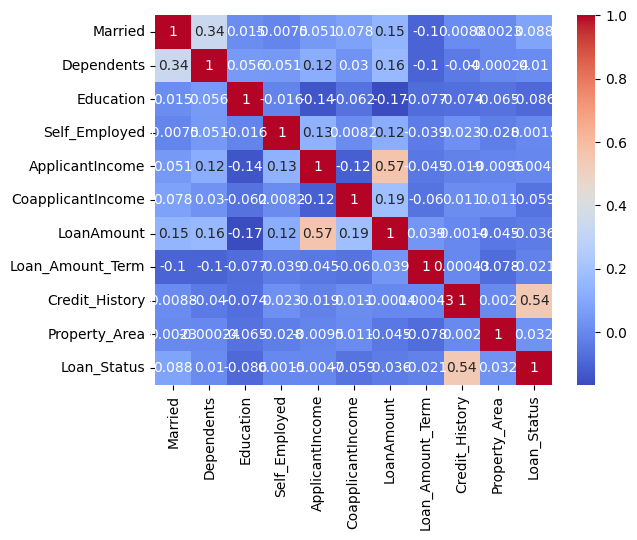

In [ ]:
sns.heatmap(loan.corr(),annot=True,cmap="coolwarm")

<Axes: >

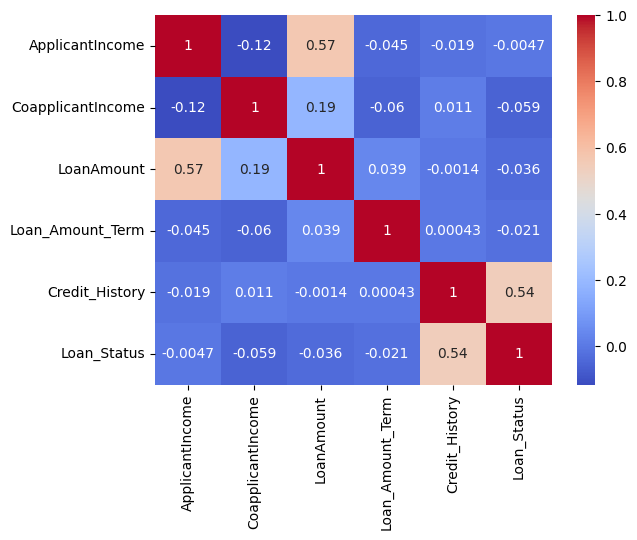

In [ ]:
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")

In [ ]:
loan.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

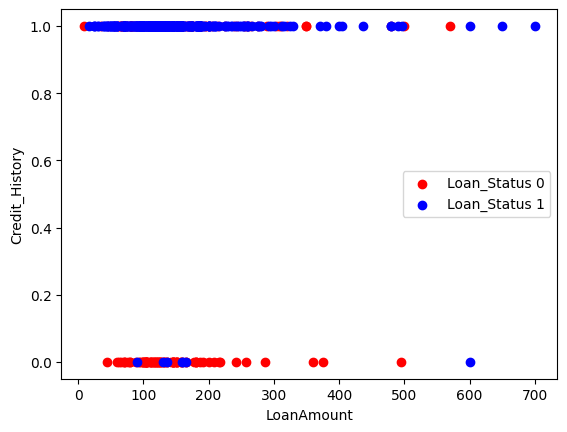

In [ ]:
import matplotlib.pyplot as plt

# boolean indexing to filter the data
loan_status_0 = loan['Loan_Status'] == 0
loan_status_1 = loan['Loan_Status'] == 1

# create the scatter plot
plt.scatter(loan[loan_status_0]['LoanAmount'], loan[loan_status_0]['Credit_History'], c='r', label='Loan_Status 0')
plt.scatter(loan[loan_status_1]['LoanAmount'], loan[loan_status_1]['Credit_History'], c='b', label='Loan_Status 1')

# add axis labels and legend
plt.xlabel('LoanAmount')
plt.ylabel('Credit_History')
plt.legend()
plt.show()


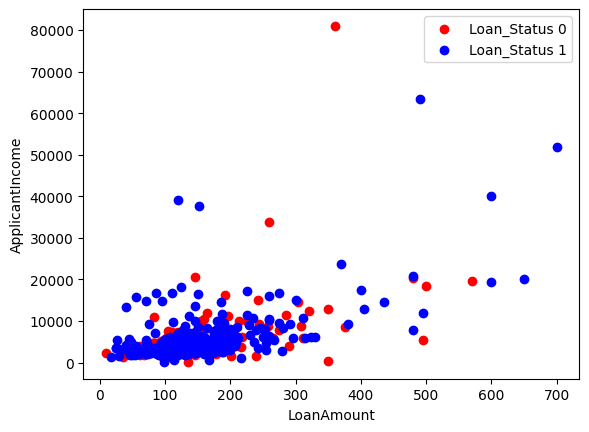

In [ ]:
# create the scatter plot
plt.scatter(loan[loan_status_0]['LoanAmount'], loan[loan_status_0]['ApplicantIncome'], c='r', label='Loan_Status 0')
plt.scatter(loan[loan_status_1]['LoanAmount'], loan[loan_status_1]['ApplicantIncome'], c='b', label='Loan_Status 1')

# add axis labels and legend
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()


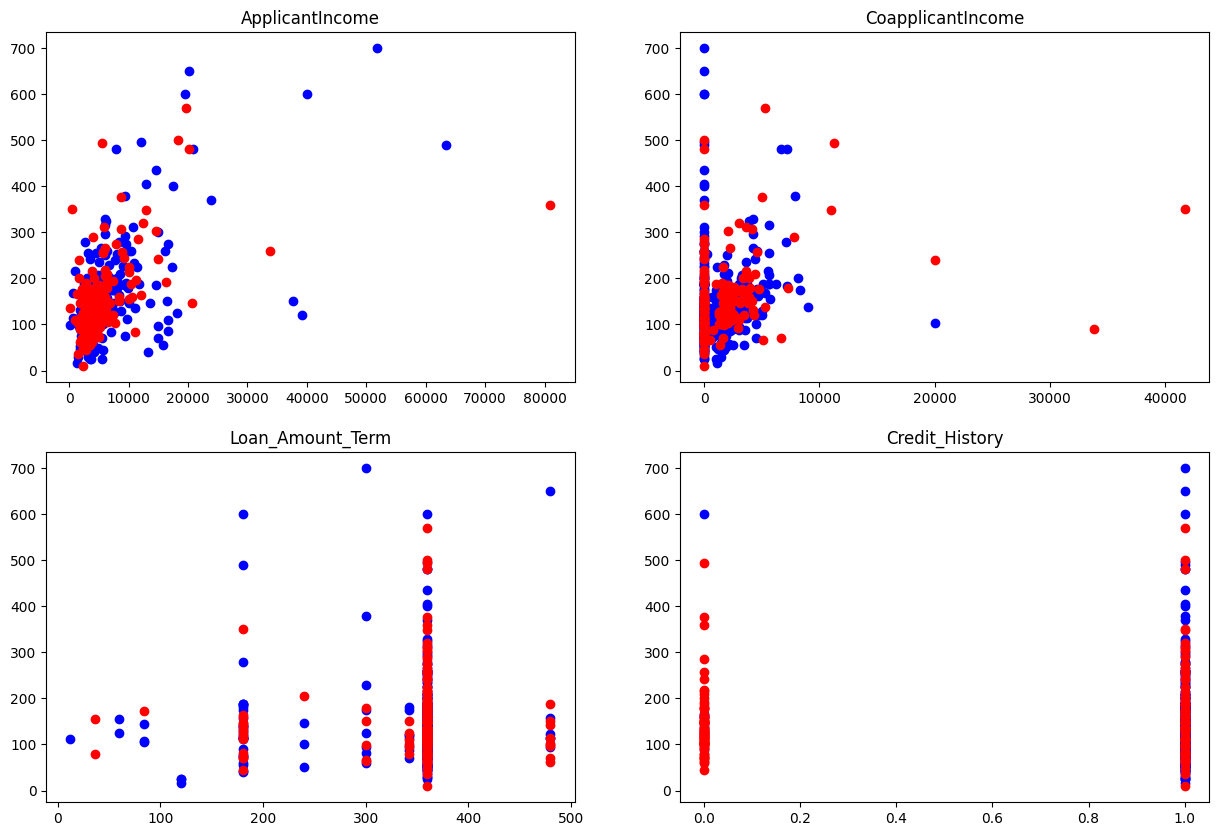

In [ ]:
import matplotlib.pyplot as plt

# Define the variables to plot
variables = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Loop through each variable and plot it against the target variable
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    ax.set_title(var)
    for status in loan[target].unique():
        color = 'blue' if status == 1 else 'red'
        ax.scatter(loan[var][loan[target]==status], loan['LoanAmount'][loan[target]==status], color=color)
plt.show()


In [ ]:
X=loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',]]
y=loan["Loan_Status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [ ]:
X_train_Scaled

array([[-0.39026593,  0.44985086, -0.00554663,  0.2786537 ,  0.42125768,
        -0.0260643 ],
       [-0.23129149, -0.28947847, -0.42252599,  0.2786537 ,  0.42125768,
        -0.0260643 ],
       [ 0.66601612,  2.33697878,  3.06967612, -0.65846251,  0.42125768,
        -1.30582152],
       ...,
       [ 1.98636868, -0.58654701,  1.04993236,  0.2786537 ,  0.42125768,
        -0.0260643 ],
       [-0.00546797, -0.05553699,  0.21597365,  0.2786537 , -2.37384396,
        -0.0260643 ],
       [-0.51232371, -0.58654701, -1.06102563,  2.15288613, -2.37384396,
        -0.0260643 ]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_Scaled,y_train)
y_pred2=lr.predict(X_test_Scaled)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7723577235772358
[[13 26]
 [ 2 82]]
0.7592592592592593


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
svm = SVC(kernel = 'poly',random_state=42,degree=2,C=1)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

models = [
    ('svc_degree1', SVC(kernel='poly', random_state=42, degree=1, C=1)),
    ('svc_degree2', SVC(kernel='poly', random_state=42, degree=2, C=1)),
    ('svc_degree3', SVC(kernel='poly', random_state=42, degree=3, C=1)),
    ('svc_degree4', SVC(kernel='poly', random_state=42, degree=4, C=1)),
    ('svc_degree5', SVC(kernel='poly', random_state=42, degree=5, C=1))
]

voting_ensemble_svm = VotingClassifier(estimators=models, voting='hard')


In [ ]:
voting_ensemble_svm.fit(X_train_Scaled, y_train)

VotingClassifier(estimators=[('svc_degree1',
                              SVC(C=1, degree=1, kernel='poly',
                                  random_state=42)),
                             ('svc_degree2',
                              SVC(C=1, degree=2, kernel='poly',
                                  random_state=42)),
                             ('svc_degree3',
                              SVC(C=1, kernel='poly', random_state=42)),
                             ('svc_degree4',
                              SVC(C=1, degree=4, kernel='poly',
                                  random_state=42)),
                             ('svc_degree5',
                              SVC(C=1, degree=5, kernel='poly',
                                  random_state=42))])

In [ ]:
y_pred_svm = voting_ensemble_svm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
print(accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(precision_score(y_test,y_pred_svm))

0.4878048780487805
[[23 16]
 [47 37]]
0.6981132075471698


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid with different degrees to test
param_grid = {'degree': [1, 2, 3, 4, 5]}

# Create the SVM classifier
svm = SVC(kernel='poly', random_state=42, C=1)

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best degree
best_degree = grid_search.best_params_['degree']
print("Best degree:", best_degree)

# Get the best SVM model
best_svm = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_svm.score(X_test, y_test)
print("Accuracy:", accuracy)

KeyboardInterrupt: ignored

In [ ]:
clfs = {
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'SVM': svm,
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train_Scaled,y_train)
    y_pred = clf.predict(X_test_Scaled)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.7479674796747967
Precision -  0.7523809523809524
For  DT
Accuracy -  0.7642276422764228
Precision -  0.7619047619047619
For  LR
Accuracy -  0.7723577235772358
Precision -  0.7592592592592593
For  RF
Accuracy -  0.7804878048780488
Precision -  0.7938144329896907
For  SVM
Accuracy -  0.7804878048780488
Precision -  0.7663551401869159


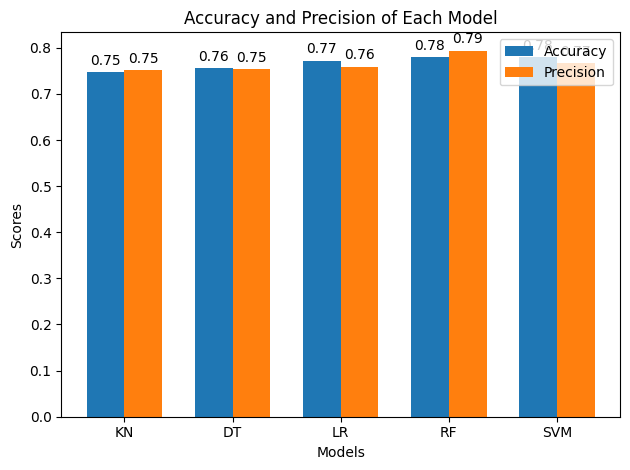

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your code to define classifiers and train_classifier function

# Create lists to store accuracy and precision values for each model
models = ['KN', 'DT', 'LR', 'RF', 'SVM']
accuracy_values = []
precision_values = []

# Train and evaluate each classifier
for model in models:
    clf = clfs[model]
    accuracy, precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_values.append(accuracy)
    precision_values.append(precision)

# Plot the accuracy and precision values
index = np.arange(len(models))
bar_width = 0.35

fig, ax = plt.subplots()
accuracy_bars = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
precision_bars = ax.bar(index + bar_width, precision_values, bar_width, label='Precision')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision of Each Model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Add the values as text labels on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(accuracy_bars)
autolabel(precision_bars)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Create the base SVM classifier
svm_base = SVC(kernel='poly', degree=1, random_state=42)

# Create the BaggingClassifier
bagging_model_svm = BaggingClassifier(base_estimator=svm_base, n_estimators=50, random_state=42,max_samples=0.25)

# Fit the BaggingClassifier to the training data
bagging_model_svm.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_model_svm.predict(X_test)

# Evaluate the model
accuracy = bagging_model_svm.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6829268292682927


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
clfs = {
    'LR': lrc,
    'RF': rfc,
}
voting_ensemble = VotingClassifier(estimators=list(clfs.items()), voting='hard')


In [ ]:
voting_ensemble.fit(X_train_Scaled, y_train)
y_pred = voting_ensemble.predict(X_test_Scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7804878048780488
[[19 20]
 [ 7 77]]
0.7938144329896907


In [ ]:
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D,Dropout
from keras import Sequential

In [ ]:


# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=6))  # Input layer with 6 features
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 units
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               896       
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 32)                4128      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 8)                 264       
                                                                 
 dropout_10 (Dropout)        (None, 8)                 0         
                                                                 
 dense_42 (Dense)            (None, 1)               

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


callback=EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(X_train_Scaled,y_train,validation_split=0.2, epochs=100, batch_size=16,callbacks=callback)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6857 - accuracy: 0.6199 - val_loss: 0.6454 - val_accuracy: 0.7576
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.7755 - val_loss: 0.5966 - val_accuracy: 0.7778
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7985 - val_loss: 0.5651 - val_accuracy: 0.7778
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5079 - accuracy: 0.8189 - val_loss: 0.5558 - val_accuracy: 0.7778
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8214 - val_loss: 0.5638 - val_accuracy: 0.7778
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.8291 - val_loss: 0.5689 - val_accuracy: 0.7778
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.8316 - val_loss: 0.5689 - val_accuracy: 0.7778
Epoch 8/100


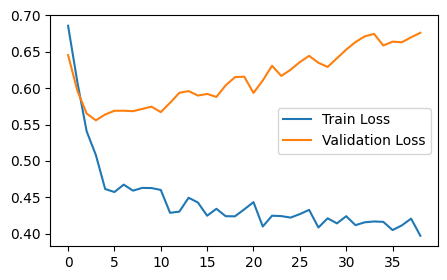

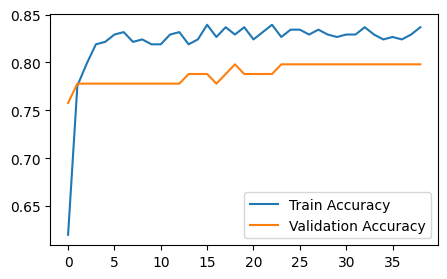

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Validation Accuracy : ",np.mean(history.history['val_accuracy']))
print("Training Accuracy : ",np.mean(history.history['accuracy']))

Validation Accuracy :  0.7881377858993335
Training Accuracy :  0.8211015371175913
